# Funnel Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
funnel = pd.read_excel('AssignmentData.xlsx', sheet_name = 'WorkerFunnel')

In [3]:
print(funnel.head())

                  Date Quarter Department Targeted Productivity Overtime   
0  2015-01-01 00:00:00      Q1     Sewing                   0.8     7080  \
1  2015-01-01 00:00:00      Q1  Finishing                  0.75      960   
2  2015-01-01 00:00:00      Q1     Sewing                   0.8     3660   
3  2015-01-01 00:00:00      Q1     Sewing                   0.8     3660   
4  2015-01-01 00:00:00      Q1     Sewing                   0.8     1920   

  No. of Workers Actual Productivity  
0             59            0.940725  
1              8              0.8865  
2           30.5             0.80057  
3           30.5             0.80057  
4             56                 NaN  


In [4]:
# Missing Values
print(funnel.isnull().sum())

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      29
dtype: int64


In [5]:
# Filling Missing Values with 0
funnel = funnel.fillna(0)
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,0


In [6]:
# Removing Duplicate Values
funnel = funnel.drop_duplicates()
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,0
5,2015-01-01 00:00:00,Q1,Sewing,0.8,6720,56,0.800125


In [7]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1162 non-null   object
 1   Quarter                1162 non-null   object
 2   Department             1162 non-null   object
 3   Targeted Productivity  1162 non-null   object
 4   Overtime               1162 non-null   object
 5   No. of Workers         1162 non-null   object
 6   Actual Productivity    1162 non-null   object
dtypes: object(7)
memory usage: 72.6+ KB


In [8]:
funnel.shape

(1162, 7)

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

funnel['Targeted Productivity'] = pd.to_numeric(funnel['Targeted Productivity'], errors='coerce')
funnel['Overtime'] = pd.to_numeric(funnel['Overtime'], errors='coerce')
funnel['No. of Workers'] = pd.to_numeric(funnel['No. of Workers'], errors='coerce')
funnel['Actual Productivity'] = pd.to_numeric(funnel['Actual Productivity'], errors='coerce')

# Dropping 'Date' column which is not relevent for PCA
#funnel.drop('Date', axis=1, inplace=True)

#Defining categorical columns and numerical columns
categorical_colmuns = ['Quarter', 'Department']
numerical_columns = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']

#OneHotEncoding on categorical columns and Scaling on numerical columns
preprocessor = ColumnTransformer(
transformers = [
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler())
    ]), numerical_columns),
    ('cat', OneHotEncoder(), categorical_colmuns)
])

# Performing PCA
pca = PCA(n_components=2)

# Pipeline for scaling, encoding, and PCA
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca)])

# Fitting transform data
funnel_pca = pipeline.fit_transform(funnel)

# Transformed PCA data
print(funnel_pca)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[[ 1.16772514 -1.60161417]
 [-1.90599024 -0.3807574 ]
 [-0.17619723 -0.82087194]
 ...
 [-1.57810674  1.20195106]
 [-1.29562416  0.83725195]
 [-1.59594707  1.64833313]]
[0.41298566 0.24659909]
[0.41298566 0.65958475]


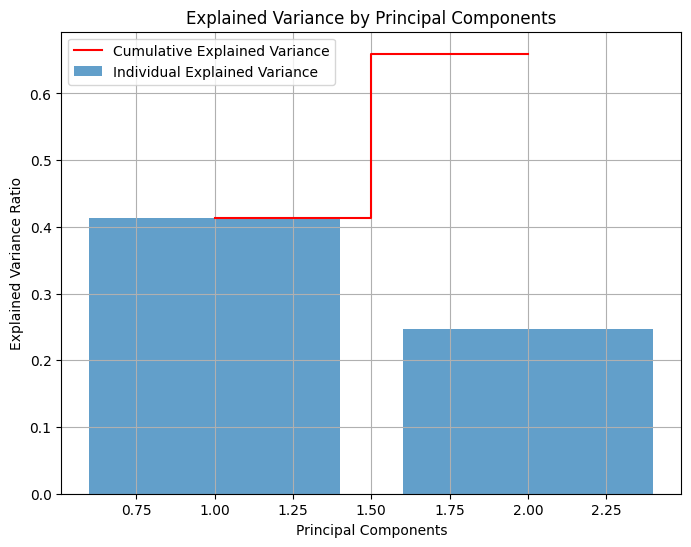

In [10]:
# Visualizing explained ratio by each principal component
plt.figure(figsize=(8,6))
plt.bar(range(1,len(explained_variance)+1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1,len(cumulative_variance)+1), cumulative_variance, where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

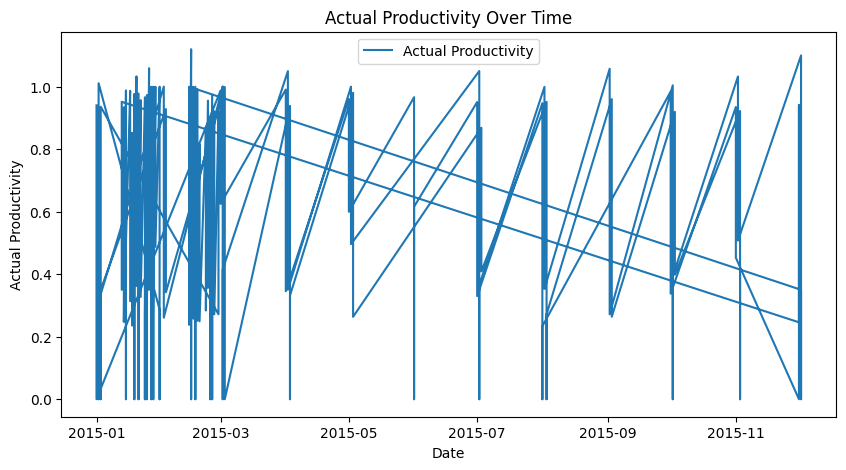

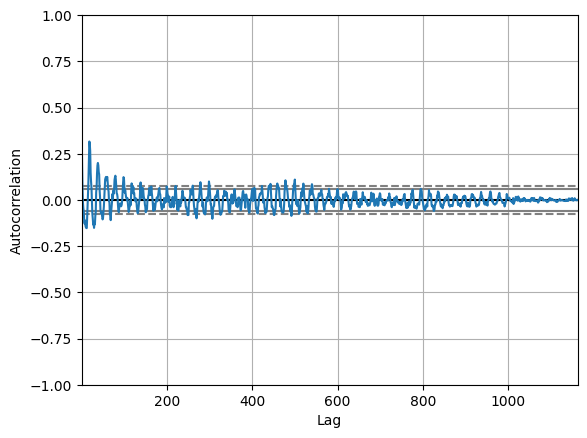

C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

                                SARIMAX Results                                
Dep. Variable:     Actual Productivity   No. Observations:                 1162
Model:                  ARIMA(1, 1, 1)   Log Likelihood                 274.468
Date:                 Sun, 15 Sep 2024   AIC                           -542.936
Time:                         18:46:39   BIC                           -527.764
Sample:                              0   HQIC                          -537.211
                                - 1162                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3868      0.022     17.815      0.000       0.344       0.429
ma.L1         -0.9948      0.004   -260.218      0.000      -1.002      -0.987
sigma2         0.0364      0.001     39.047 

C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


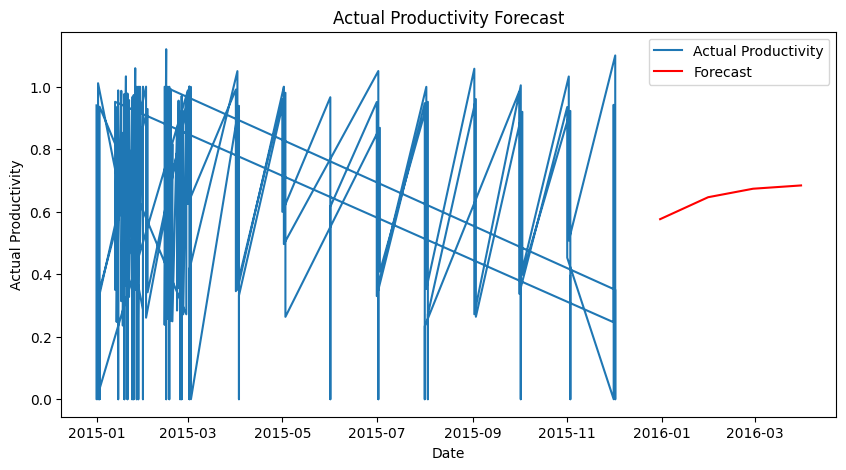

In [11]:
# Building an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Setting Date column as index and coverting to DateTime
funnel['Date'] = pd.to_datetime(funnel['Date'])
funnel.set_index('Date', inplace=True)

# Handling missing values
funnel['Actual Productivity'].fillna(method='ffill', inplace=True)

# Visualizing data to get sense of trends
plt.figure(figsize=(10, 5))
plt.plot(funnel['Actual Productivity'], label='Actual Productivity')
plt.title('Actual Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.show()

# Checking for stationarity with autocorrelation plot
autocorrelation_plot(funnel['Actual Productivity'])
plt.show()

# Fitting ARIMA model
model = ARIMA(funnel['Actual Productivity'], order=(1,1,1))
model_fit = model.fit()

# Model's Summary
print(model_fit.summary())

# Forecasting next 4 Quarters
forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)
print(f"\nForecast for next {forecast_steps} periods:\n", forecast)

# Visualizing forecasted data
plt.figure(figsize=(10, 5))
plt.plot(funnel.index, funnel['Actual Productivity'], label='Actual Productivity')
plt.plot(pd.date_range(funnel.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('Actual Productivity Forecast')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.show()

C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

Mean Absolute Percentage Error (MAPE): 98742305194257.9375
Mean Squared Error (MSE): 0.0412


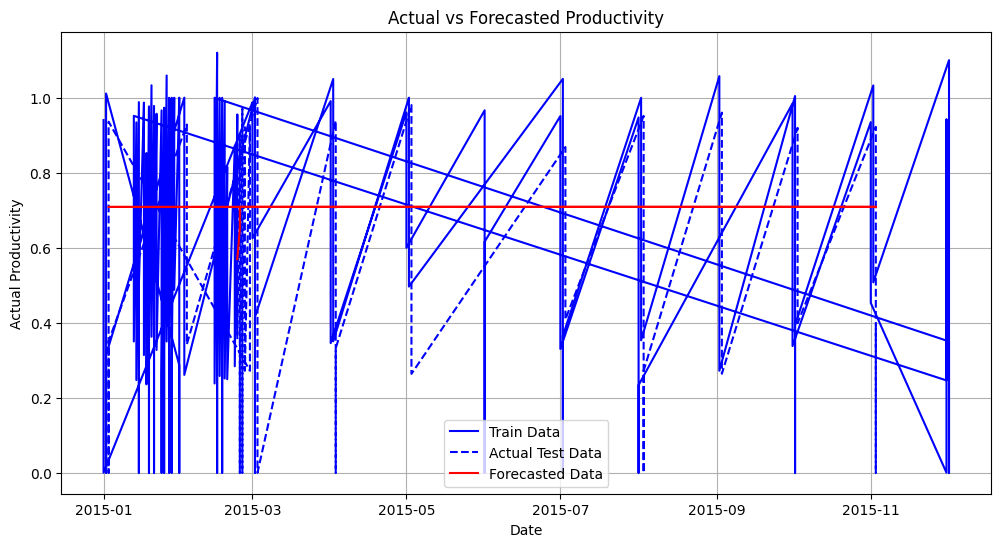

In [12]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

#Splitting data into train and test set
train_size = int(len(funnel) * 0.75)  # 75% for training
train, test = funnel.iloc[:train_size], funnel.iloc[train_size:]

# Fitting ARIMA model
model = ARIMA(train['Actual Productivity'], order=(1, 1, 1))  
model_fit = model.fit()

# Forecast the test set period
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = test.index

# Computing MAPE and MSE
actual = test['Actual Productivity']
mape = mean_absolute_percentage_error(actual, forecast)
mse = mean_squared_error(actual, forecast)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Visualizing the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Actual Productivity'], label='Train Data', color='blue')
plt.plot(test.index, test['Actual Productivity'], label='Actual Test Data', color='blue', linestyle='--')
plt.plot(test.index, forecast, label='Forecasted Data', color='red')
plt.title('Actual vs Forecasted Productivity')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

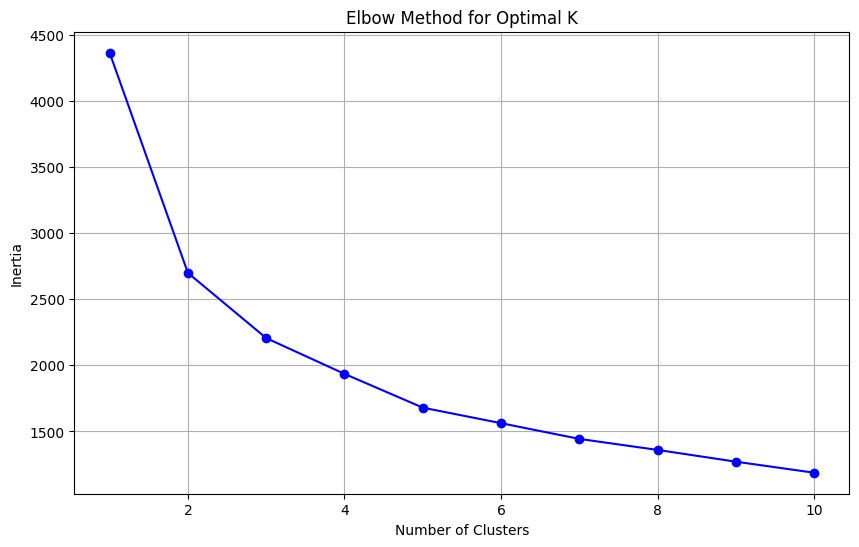

C:\Users\farru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
 [[2.94429945e-01 3.48992806e+03 2.81906475e+01]
 [7.37234665e-01 7.41476861e+03 5.49044266e+01]
 [8.04659350e-01 1.98408745e+03 1.65057034e+01]]

Data with Cluster Labels:
            Quarter Department  Targeted Productivity  Overtime   
Date                                                             
2015-01-01      Q1     Sewing                   0.80    7080.0  \
2015-01-01      Q1  Finishing                   0.75     960.0   
2015-01-01      Q1     Sewing                   0.80    3660.0   
2015-01-01      Q1     Sewing                   0.80    1920.0   
2015-01-01      Q1     Sewing                   0.80    6720.0   
...            ...        ...                    ...       ...   
2015-11-03      Q2  Finishing                   0.75     960.0   
2015-11-03      Q2  Finishing                   0.70     960.0   
2015-11-03      Q2  Finishing                   0.65     960.0   
2015-11-03      Q2  Finishing                   0.75    1800.0   
2015-11-03      Q

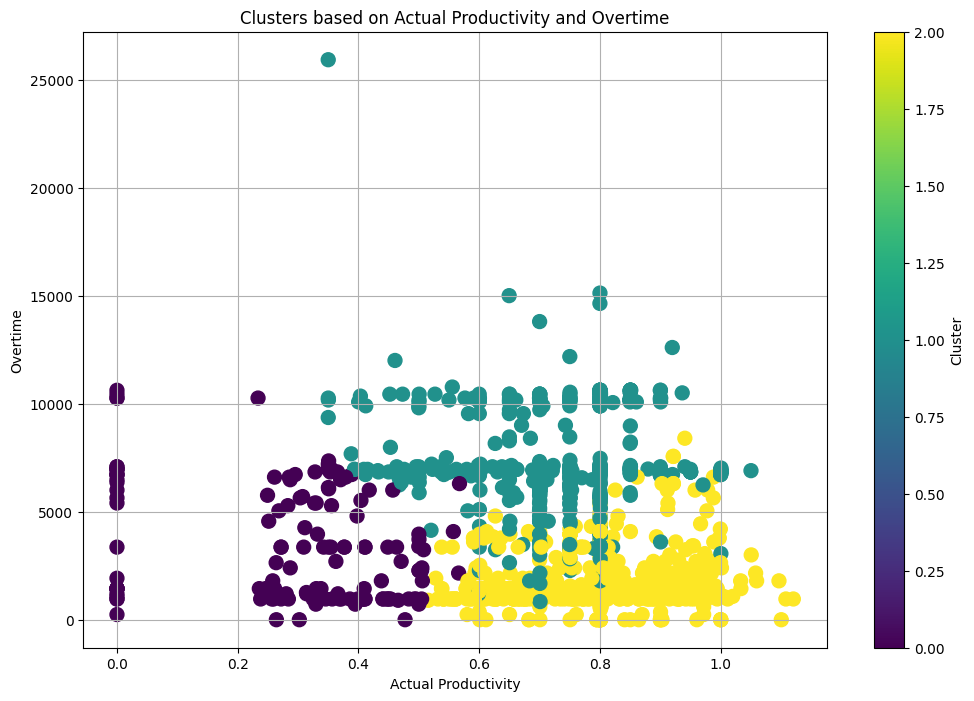

In [13]:
# Performing K-Means clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

funnel = funnel.fillna(0)

numerical_columns = ['Actual Productivity', 'Overtime', 'No. of Workers']
categorical_columns = ['Quarter']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

processed_features = preprocessor.fit_transform(funnel)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(processed_features)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

optimal_k = 3  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(processed_features)

funnel['Cluster'] = clusters

print("Cluster Centers:\n", preprocessor.named_transformers_['num'].inverse_transform(kmeans.cluster_centers_[:, :len(numerical_columns)]))

print("\nData with Cluster Labels:\n", funnel)

plt.figure(figsize=(12, 8))
plt.scatter(funnel['Actual Productivity'], funnel['Overtime'], c=funnel['Cluster'], cmap='viridis', s=100)
plt.xlabel('Actual Productivity')
plt.ylabel('Overtime')
plt.title('Clusters based on Actual Productivity and Overtime')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Credit card data analysis 

In [15]:
transactions = pd.read_excel('AssignmentData.xlsx', sheet_name = 'creditcard')

In [16]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  object 
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  object 
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  object 
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
# Checking Missing values
transactions.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
# Removing duplicates
transactions = transactions.drop_duplicates()
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
transactions.shape

(283726, 31)

In [21]:
# Statistical data
transactions.describe()

,Time,V1,V3,V4,V5,V6,V8,V10,V11,V12,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,0.001613,-0.002966,0.001828,-0.001139,-0.000854,-0.001441,0.000202,-0.000715,...,0.000187,-0.000371,-0.000015,0.000198,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.508682,1.414184,1.377008,1.331931,1.179054,1.076407,1.018720,0.994674,...,0.769984,0.723909,0.724550,0.623702,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-48.325589,-5.683171,-113.743307,-26.160506,-73.216718,-24.588262,-4.797473,-18.683715,...,-54.497720,-34.830382,-10.933144,-44.807735,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.889682,-0.850134,-0.689830,-0.769031,-0.208828,-0.535578,-0.761649,-0.406198,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.179963,-0.022248,-0.053468,-0.275168,0.021898,-0.093237,-0.032306,0.139072,...,-0.062353,-0.029441,0.006675,-0.011159,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,1.026960,0.739647,0.612218,0.396792,0.325704,0.453619,0.739579,0.616976,...,0.133207,0.186194,0.528245,0.147748,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,9.382558,16.875344,34.801666,73.301626,20.007208,23.745136,12.018913,7.848392,...,39.420904,27.202839,10.503090,22.528412,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


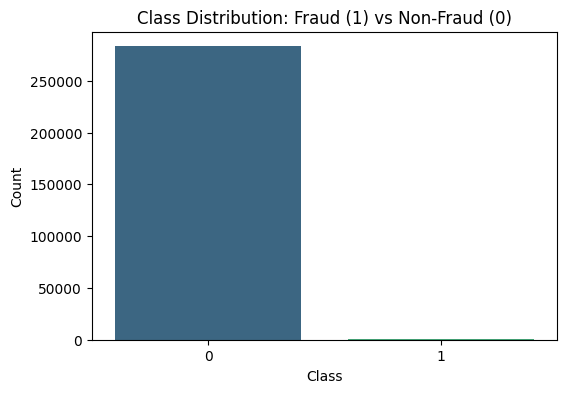

In [23]:
# Checking the distribution of the 'Class' column
class_counts = transactions['Class'].value_counts()

import seaborn as sns
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Class Distribution: Fraud (1) vs Non-Fraud (0)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

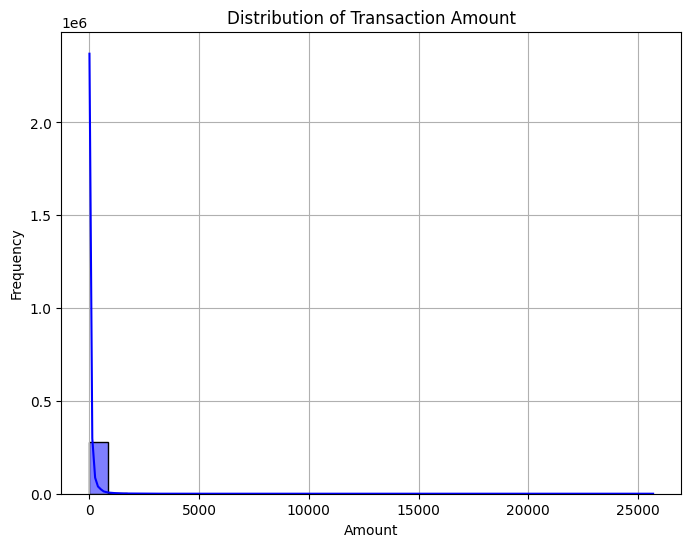

In [25]:
# Plot the distribution of 'Amount'
plt.figure(figsize=(8, 6))
sns.histplot(transactions['Amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

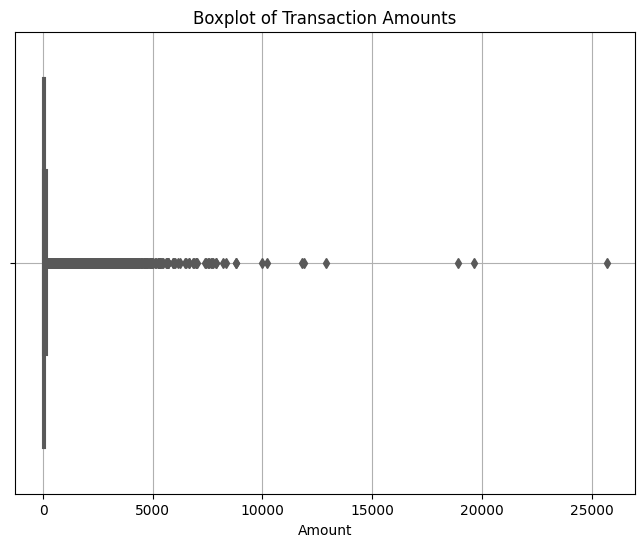

In [26]:
# Boxplot for 'Amount' to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount', data=transactions, palette="Set2")
plt.title('Boxplot of Transaction Amounts')
plt.grid(True)
plt.show()

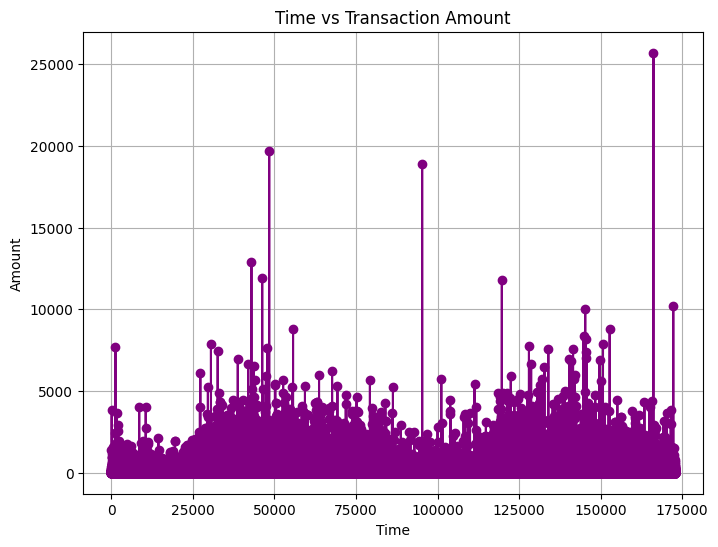

In [27]:
# Plot Time vs. Amount
plt.figure(figsize=(8, 6))
plt.plot(transactions['Time'], transactions['Amount'], marker='o', linestyle='-', color='purple')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.grid(True)
plt.show()